In [1]:
import numpy as np
import gluoncv
from matplotlib import pyplot as plt

In [2]:
train_root = "/home/jg/MILA/COMP767-Reinforcement_Learning/COMP767/project/data/VOCtrainval_06-Nov-2007/VOCdevkit"
eval_root = "/home/jg/MILA/COMP767-Reinforcement_Learning/COMP767/project/data/VOCdevkit"

train_dataset = gluoncv.data.VOCDetection(root = train_root, splits=[(2007, 'trainval')])
val_dataset = gluoncv.data.VOCDetection(root = eval_root, splits=[(2007, 'test')])
print('Num of training images:', len(train_dataset))
print('Num of validation images:', len(val_dataset))

Num of training images: 5011
Num of validation images: 4952


In [3]:
train_image, train_label = train_dataset[5]
print('Image size (height, width, RGB):', train_image.shape)

Image size (height, width, RGB): (364, 480, 3)


In [4]:
bounding_boxes = train_label[:, :4]
print('Num of objects:', bounding_boxes.shape[0])
print('Bounding boxes (num_boxes, x_min, y_min, x_max, y_max):\n',  bounding_boxes)

Num of objects: 2
Bounding boxes (num_boxes, x_min, y_min, x_max, y_max):
 [[184.  61. 278. 198.]
 [ 89.  77. 402. 335.]]


In [5]:
class_ids = train_label[:, 4:5]
print('Class IDs (num_boxes, ):\n', class_ids)

Class IDs (num_boxes, ):
 [[14.]
 [12.]]


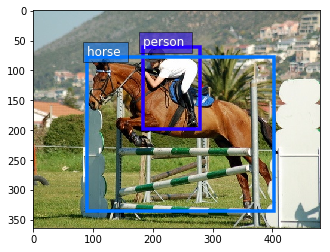

In [9]:
gluoncv.utils.viz.plot_bbox(train_image.asnumpy(), bounding_boxes, scores=None,
                    labels=class_ids, class_names=train_dataset.classes)
plt.show()

In [7]:
print(train_label)

[[184.  61. 278. 198.  14.   0.]
 [ 89.  77. 402. 335.  12.   0.]]
